In [1]:
# import the relavent packages
import pandas_datareader as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
# define the data duration
start = dt.datetime(2017,1,1)
end = dt.datetime(2020,1,30)

# extract the APPLE stock price from Yahoo finance
data = web.DataReader('AAPL', 'yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.500973
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.470192
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.609884
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.917688
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.173399
...,...,...,...,...,...,...
2020-01-24,80.832497,79.379997,80.062500,79.577499,146537600.0,78.896149
2020-01-27,77.942497,76.220001,77.514999,77.237503,161940000.0,76.576187
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.742477


In [3]:
# I just simulate the close price
prices = data['Close']
# the daily returns
returns = prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
                ...   
2020-01-24   -0.002882
2020-01-27   -0.029405
2020-01-28    0.028289
2020-01-29    0.020932
2020-01-30   -0.001449
Name: Close, Length: 774, dtype: float64

In [4]:
# all the simulations are based on the previous days and the first simulation based on the last obervation
last_price = prices[-1]

In [5]:
# number of simulations
num_simulations = 1000
# number of trading days per year
num_days = 252

In [6]:
# create a empty dataframe
simulation_df = pd.DataFrame()

# loope the simulation
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count = count + 1
        
    simulation_df[x] = price_series

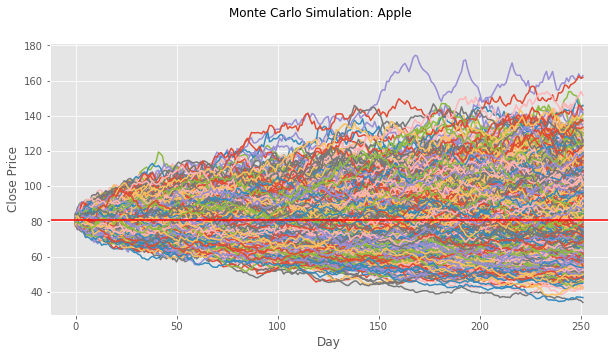

In [7]:
# Visualize the simulation data
plt.figure(figsize=(10,5)).suptitle('Monte Carlo Simulation: Apple')
plt.plot(simulation_df)
plt.axhline(y=last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.show()